# Análise do Algoritmo da FFT

Nesse notebook, será implementado um código que calcule a FFT de um sinal, utilizando o algorito de decimação no tempo Cooley-Turkey.


In [216]:
import numpy as np
import cmath
import matplotlib.pyplot as plt

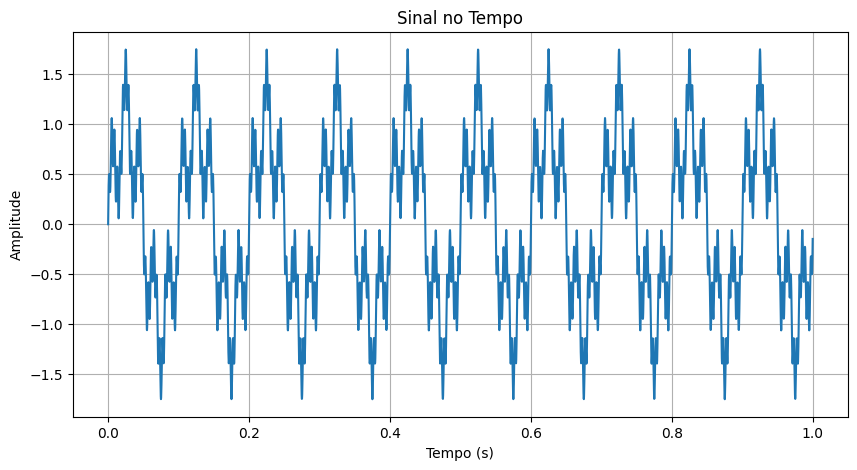

In [225]:
# Sinal no tempo
#sinal = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 0, 0, 0, 0])

t = np.arange(0, 1, 1/4096)  # Vetor de tempo de 0 a 1 segundo
f1 = 10  # Frequência da primeira senoide (Hz)
f2 = 50  # Frequência da segunda senoide (Hz)
f3 = 250
amplitude1 = 1.0
amplitude2 = 0.5
amplitude3 = 0.25

sinal = amplitude1 * np.sin(2*np.pi*f1*t) + amplitude2 * np.sin(2*np.pi*f2*t) + amplitude3*np.sin(2*np.pi*f3*t)

plt.figure(figsize=(10, 5))
plt.plot(t, sinal)
plt.title('Sinal no Tempo')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

## Uso da função np.fft.fft para efeito de comparação.

In [218]:
%time
transformada = np.fft.fft(sinal)

print(transformada)


Wall time: 0 ns
[-1.08269092e-13+0.00000000e+00j -2.20007857e-13+1.94312449e-13j
 -1.10871995e-13-3.37396777e-13j ...  1.00046282e-13-1.65525938e-13j
 -1.05843958e-13+3.40674707e-13j -2.20007857e-13-1.94312449e-13j]


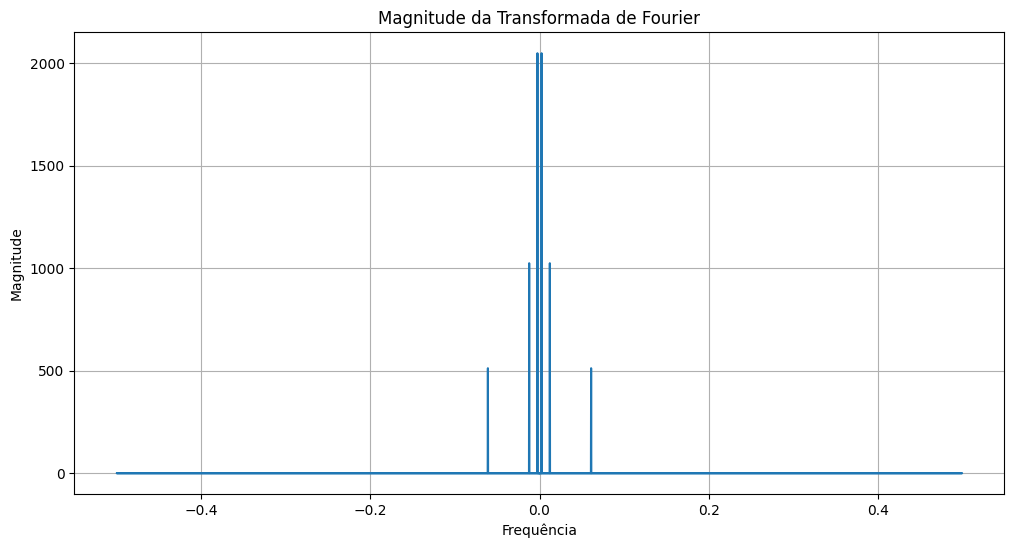

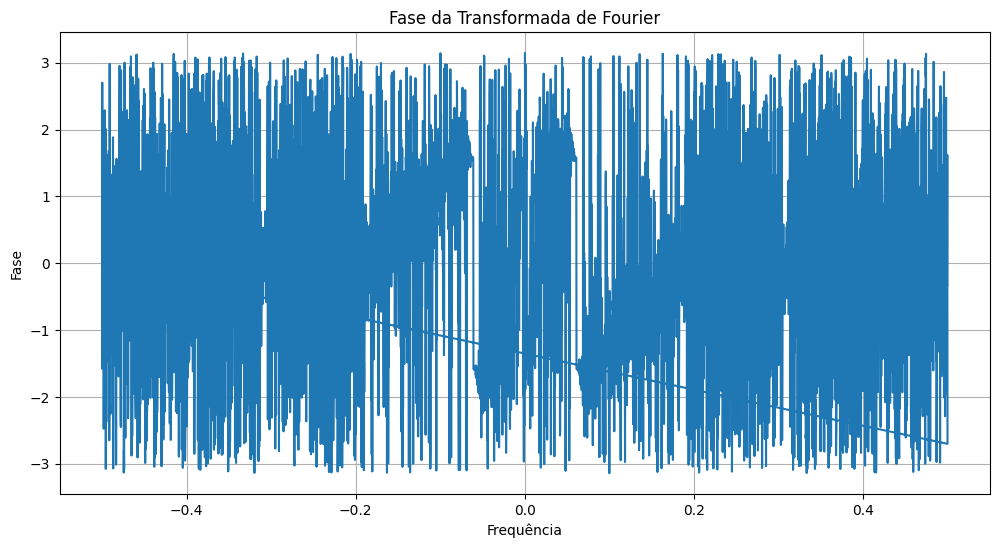

In [219]:
#Plot do módulo e da fase da transformada
freq = np.fft.fftfreq(len(sinal))

magnp = np.abs(transformada)
fasenp = np.angle(transformada)

plt.figure(figsize=(12, 6))
plt.plot(freq, magnp)
plt.title('Magnitude da Transformada de Fourier')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(freq, fasenp)
plt.title('Fase da Transformada de Fourier')
plt.xlabel('Frequência')
plt.ylabel('Fase')
plt.grid(True)
plt.show()

In [220]:
print(freq)
help(np.fft.fftfreq)

[ 0.          0.00024414  0.00048828 ... -0.00073242 -0.00048828
 -0.00024414]
Help on function fftfreq in module numpy.fft:

fftfreq(n, d=1.0)
    Return the Discrete Fourier Transform sample frequencies.
    
    The returned float array `f` contains the frequency bin centers in cycles
    per unit of the sample spacing (with zero at the start).  For instance, if
    the sample spacing is in seconds, then the frequency unit is cycles/second.
    
    Given a window length `n` and a sample spacing `d`::
    
      f = [0, 1, ...,   n/2-1,     -n/2, ..., -1] / (d*n)   if n is even
      f = [0, 1, ..., (n-1)/2, -(n-1)/2, ..., -1] / (d*n)   if n is odd
    
    Parameters
    ----------
    n : int
        Window length.
    d : scalar, optional
        Sample spacing (inverse of the sampling rate). Defaults to 1.
    
    Returns
    -------
    f : ndarray
        Array of length `n` containing the sample frequencies.
    
    Examples
    --------
    >>> signal = np.array([-2, 8, 6,

# Algoritmo da FFT: Cooley-Turkey

O algoritmo do cálculo da FFT, é baseado em três pilares:

1. Decimação no tempo: Dividi o sinal em pares menores, para processar a DFT separadamente;
2. Simetria do Conjulgado Complexo: $W_N^{k[N-n]} = W_N^{-kn} = (W_N^{kn})*$
3. Periodicidade em ne k: $W_N^{kn} = W_N^{k(n+N)} = W_N^{(k+N)*n}$

Para melhor compreensão do algoritmo da FFT, vamos calcular o valor de $W_N$ para índices múltiplos de N:

$$W_N^{-kn} = e^{j(2\pi /N)Nk} = 1$$

Para um $N = 2^x$, podemos dividir o sinal pelos índices ímpares e pares, resultando em duas DFTs de tamanho $N/2$. Podemos então dividir esses sinais em duas partes, resultando em 4 DFTs de tamanho $N/4$, e  assim sucessivamente, até que tenhamos $N/2$ DFTs de tamanho N = 2.

Assim, dividindo uma DFT em duas partes, obtemos:

$$X[k] = \sum_{r = 0}^{(N/2)-1} x[2 r]W_N^{2 rk} + \sum_{r = 0}^{(N/2)-1} x2 r + 1^{rk}$$

Mas como $W_N^2 =W_{N/2}$: 

$$X[k] = \sum_{r = 0}^{(N/2)-1} x[2 r]W_{N/2}^{rk} + W_N^k\sum_{r = 0}^{(N/2)-1} x[2 r + 1]W_{N/2}^{rk}$$

Ou

$$X[k] = G[k] + W_N^k H[k] , k = 0, 1, ..., N-1$$

Podemos então ilustrar esse comportamento a partir de um gráfico de fluxo, na figura abaixo:

<div align="center">
  <img src="N_2pointDFT.png" alt="Fluxograma FFT1" />
  <p style="text-align:center;"><em>Figura 1: Fluxograma FFT. Fonte: Discrete Time Signal Processing - Allan V. Oppenheim </em> </p>
</div>


Observe que cada termo par é somado a um termo ímpar multiplicado por um peso de $W_N^k$
a DFT de N/2 pontos também pode ser calculada do mesmo modo, de forma que:

<div align="center">
  <img src="N_4pointDFT.png" alt="Fluxograma FFT2" />
  <p style="text-align:center;"><em>Figura 2: Fluxograma com DFT de N/4 pontos. Fonte: Discrete Time Signal Processing - Allan V. Oppenheim </em> </p>
</div>


Sabendo que $W_N^0 = 1$, e que $W_2 = W_N^{N/2} = -1$, temos que a DFT de N/4 pontos é representada pelo seguinte fluxograma:
<div align="center">
  <img src="FirstNodeFFT.png" alt="Primeiro Nó" />
  <p style="text-align:center;"><em>Figura 3: Primeiro Nó do Fluxograma. Fonte: Discrete Time Signal Processing - Allan V. Oppenheim</em> </p>
</div>


Assim, o fluxograma para N = 8, temos:

<div align="center">
  <img src="CompleteDFT.png" alt="Fluxograma Completo" />
  <p style="text-align:center;"><em>Figura 4: Fluxograma completo FFT. Fonte: Discrete Time Signal Processing - Allan V. Oppenheim</em> </p>
</div>


O código a seguir implementa essa lógica com uso de uma função recursiva, que seleciona partes do sinal cada vez menores, e realiza as operações descritas no fluxograma.
Em factor, os sinais de índice ímpar são multiplicados pelo fator $W_N$, e a função retorna a soma dos valores para cada etapa do fluxograma.

In [221]:

def fft_radix2(x):
    
    # Escolhe o valor de N como a potência de 2 mais próxima do tamanho do sinal
    N = 2**np.ceil(np.log2(len(x)))

    # Preencha o sinal com zeros até que ele tenha o tamanho da próxima potência de 2
    x_N = np.pad(x, (0, int(N) - len(x)), 'constant')
    if N <= 1: 
        return x_N
    else:
        X_even = fft_radix2(x_N[::2])
        X_odd = fft_radix2(x_N[1::2])
        factor = [cmath.exp(-2j*cmath.pi*k/N) * X_odd[k] for k in range(int(N//2))] # 
        return [X_even[k] + factor[k] for k in range(int(N//2))] + [X_even[k] - factor[k] for k in range(int(N//2))]

"""def fft_radix2(x):
    N = len(x)
    if N <= 1: 
        return x
    else:
        X_even = fft_radix2(x[::2])
        X_odd = fft_radix2(x[1::2])
        factor = [cmath.exp(-2j*cmath.pi*k/N) * X_odd[k] for k in range(N//2)]
        return [X_even[k] + factor[k] for k in range(N//2)] + [X_even[k] - factor[k] for k in range(N//2)]"""

'def fft_radix2(x):\n    N = len(x)\n    if N <= 1: \n        return x\n    else:\n        X_even = fft_radix2(x[::2])\n        X_odd = fft_radix2(x[1::2])\n        factor = [cmath.exp(-2j*cmath.pi*k/N) * X_odd[k] for k in range(N//2)]\n        return [X_even[k] + factor[k] for k in range(N//2)] + [X_even[k] - factor[k] for k in range(N//2)]'

In [222]:
%time
X = fft_radix2(sinal)
print(X)
print(len(X))

Wall time: 0 ns
[(-1.0826909169960213e-13+0j), (-2.2000785691280955e-13+1.9431244850311768e-13j), (-1.526769649719077e-13-3.48016619844488e-13j), (1.0004628163448312e-13+1.6552593837306857e-13j), (-1.7283179325461825e-14-1.042030112439158e-13j), (-7.888290844128601e-14+1.3944830894852196e-14j), (5.811656359061063e-14+2.127303114099754e-13j), (5.5636375997747196e-14+3.341603129826002e-13j), (-1.452845062189741e-13+3.382975068436091e-13j), (-2.716718168815922e-13+7.84225381473951e-13j), (-2.5571528706289393e-12-2048.0000000000005j), (2.8684450420401727e-14-1.225891579995807e-12j), (2.7513762620084503e-13-5.830267971887168e-13j), (2.1727410392796929e-13-3.1578034956791833e-13j), (1.444804478252478e-13-2.8094627877342625e-13j), (1.1819108187988823e-13-1.1955554168826598e-13j), (1.4557514144806207e-14-1.336287764461435e-13j), (1.0595429590452804e-14-1.3814426411361596e-13j), (1.1957435690962495e-14-1.4536318961807436e-13j), (2.751279171339366e-14-1.781762010284524e-13j), (7.03193740472624e-

[ 0.          0.00024414  0.00048828 ... -0.00073242 -0.00048828
 -0.00024414]


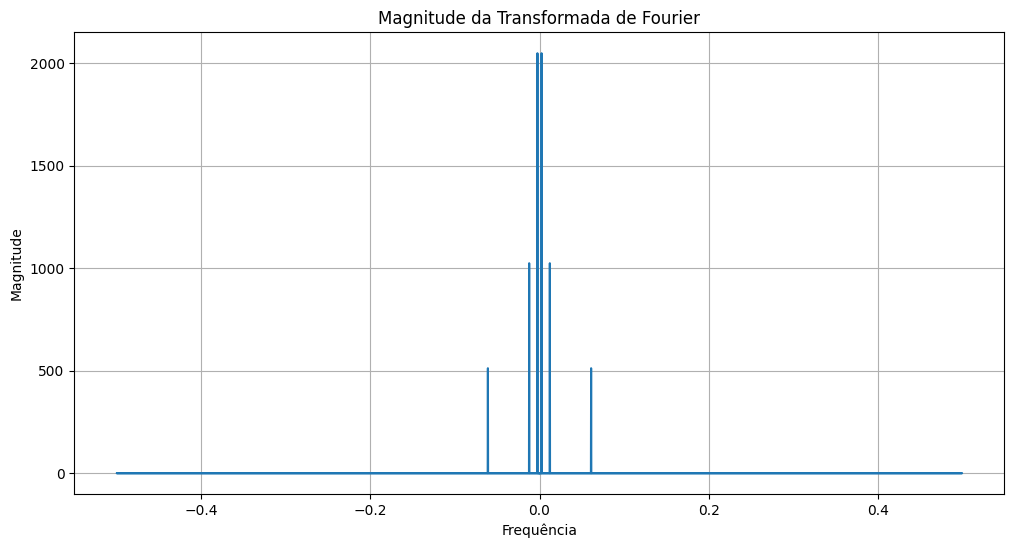

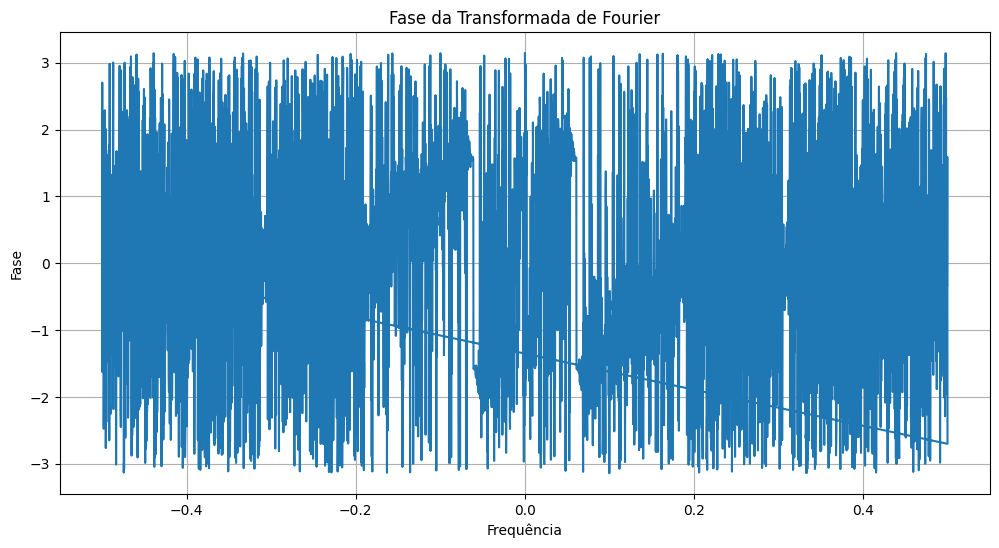

In [223]:
#Plot do módulo e fase da transformada
mag = np.abs(X)
fase = np.angle(X)
freq2 = np.fft.fftfreq(len(X))
print(freq2)
plt.figure(figsize=(12, 6))
plt.plot(freq2, mag)
plt.title('Magnitude da Transformada de Fourier')
plt.xlabel('Frequência')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(freq2, fase)
plt.title('Fase da Transformada de Fourier')
plt.xlabel('Frequência')
plt.ylabel('Fase')
plt.grid(True)
plt.show()